# Project#4 - Wrangle and Analyze Data
> **Developed By**: Rakan210 on June 17, 2019 - as psrt of Udacity Data Analyst Nanodegree program (DAND)

### Project Steps
1. **Gathering data**
2. **Assessing data**
3. **Cleaning data**

### Part#1: Gathering Data:- 
This projet required 3 source of data to be gathered: 
* The WeRateDogs Twitter archive, which is provided in the following link: [ [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) ].
* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following [ URL ](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
* Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Reading WeRateDogs Twitter archive Data**

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

**2. Obtaining Image Predictions Data Through a URL**

In [3]:
# download tsv using Requests Liburary and write it to a file
with open('image_predictions.tsv', 'wb') as file:
    file.write(requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
.content)

# Converting (TSV) file to Pandas Dataframe: 
df_images = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf-8')

**3. Obtaining Other Tweets Data Through Twitter APIs**

In [4]:
# Initiating the required keys for Twitter API
consumer_key = 'LzFMckBn32a2NCDKPOaLJEfiV'
consumer_secret = 'BTsilq6PnYYbDSNx47y7LSvg4pBAi0ke3sY2eZm1TLOx2RSXmo'
access_token = '433095012-ha6nyKGKJAr6zxPoZoIYSu50bYQTgtPgtTPpgt2T'
access_secret = 'DRtdW6Op1C9puYNUXO8eRpqX5pMOuZOdlr3kqU3h71xEz'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [5]:
# This list holds all required infor for each tweet:
collected_tweet = []

# This list holds all tweet ids in case of API error, along witht the error message: 
collected_error = []

# Quick timer to estimate processing time:  
start_time = time.time() 

index = 0

print('\n\n ===| Start processing Twitter API Data |=== \n\n')


# The API will bw used now to query and write the result in a JSON file: 
with open('tweet_json.txt','a',encoding = 'utf8') as file:
    for tweet_id in df_archive.tweet_id:
        try:
            index = index + 1
            # Get all tweet info with "Extended" mode:
            tweet_info = api.get_status(tweet_id, tweet_mode = 'extended')
            
            # Dump tweet info as a JSON object in "tweet_json.txt" (required step):
            json.dump(tweet_info._json, file)
            file.write('\n')
            
            # Dump selective info about each tweet:
            collected_tweet.append({ 'tweet_id' : int(tweet_id),
                                     'favorites': int(tweet_info._json['favorite_count']),
                                     'retweets' : int(tweet_info._json['retweet_count']),
                                     'date_time': pd.to_datetime(tweet_info._json['created_at'])})
            
        # Handling expected errors:   
        except Exception as e:
            collected_error.append(tweet_id)
            print('Error[', index ,']: Tweet ID (', tweet_id ,') - ' , str(e))
            

print('\n\n ===| The estimated processing time is: [ ' , round((time.time() - start_time)/60,2) , ' ] mins |===\n\n')



 ===| Start processing Twitter API Data |=== 


Error[ 20 ]: Tweet ID ( 888202515573088257 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 96 ]: Tweet ID ( 873697596434513921 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 102 ]: Tweet ID ( 872668790621863937 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 105 ]: Tweet ID ( 872261713294495745 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 119 ]: Tweet ID ( 869988702071779329 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 133 ]: Tweet ID ( 866816280283807744 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 156 ]: Tweet ID ( 861769973181624320 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 183 ]: Tweet ID ( 856602993587888130 ) -  [{'code': 144, 'message': 'No status found with that ID.'}]
Error[ 212 ]: Tweet ID ( 851953902622658560 ) -  [{'code': 144, 'message': 'No s

In [6]:
# Converting collected tweets to a DataFrame and save it as a CSV file:
df_collected_tweet = pd.DataFrame(collected_tweet, columns = ['tweet_id', 'favorites', 'retweets', 'date_time'])
df_collected_tweet.to_csv('tweet_json_cleaned.txt', encoding = 'utf-8', index=False)

### Part#2: Assessing Data:- 

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

### Quality  issues: (completeness, validity, accuracy, and consistency issues)

**Note: Visual assessment (VA) & Programmatic assessment (PA)**


**df_archive:**
* (PA) Change datatype of [timestamp] to datetime64 and [rating_numerator] to float.
* (VA) Rename column labels to a descriptive ones.
* (VA) Change all 'None' values should be changed to NP.NaN.
* (PA) Delete all Retweets/Replys records since they shouldn't be considered. ([retweeted_status*] & [in_reply_to*] columns)
* (VA) Modify some records that have inaccurate value in [rating_denominator] as it reasonibly to be fixed to or be multiple of "10".
* (PA) Modify some records that have inaccurate value in [rating_numerator] due to the existing of the dicimal.
* (VA) Replace invalid dogs' names with NP.NaN.
* (PA) Not all tweets have predictions photo (Archive Tweets "df_archive": 2356 rows , Predection Images "df_images": 2075 rows), so only tweet with images will be considered. 
* (PA) Delete all records that missing values in [expanded_url] column as they indicate ratings without an image.

 
### Tidiness issues: (structural issues)
**df_archive:**
* Combine dog stages (doggo, floofer, pupper and puppo) into one column called [dog_stage].
* Combine rating columns into one column called [dog_rating]

**df_master:**
* Combine all DataFrames into one master DataFrame called [df_master]. Its content should be stored in `twitter_archive_master.csv`.

### Detailed Data Assessment: 

1. **(PA) Change datatype of [timestamp] to datetime64 and [rating_numerator] to float.**
2. **(VA) Rename column labels to a descriptive ones.**

In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

3. **(VA) Change all 'None' values should be changed to NP.NaN.**
4. **(PA) Delete all Retweets/Replys records since they shouldn't be considered. ([retweeted_status*] & [in_reply_to*] columns)**

In [8]:
df_archive[['tweet_id', 'floofer','puppo','retweeted_status_id','in_reply_to_status_id']].sample(5)

,tweet_id,floofer,puppo,retweeted_status_id,in_reply_to_status_id
204,852936405516943360,None,None,8.316501e+17,NaN
851,765669560888528897,None,None,NaN,NaN
1277,709042156699303936,None,None,NaN,NaN
1655,683391852557561860,None,None,NaN,NaN
1662,682962037429899265,None,None,NaN,NaN


**5. (VA) Modify some records that have inaccurate value in [rating_denominator].**

In [9]:
df_archive[df_archive.text.str.contains('1/2')|df_archive.text.str.contains('960/0')
           |df_archive.text.str.contains('24/7')][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


**6. (PA) Modify some records that have inaccurate value in [rating_numerator]**

In [10]:
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


**7. (VA) Replace invalid dogs' names with NP.NaN.**


In [11]:
df_archive.name.value_counts().head(5)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

**8. (PA) Not all tweets have predictions photo**

In [12]:
df_archive.shape[0],df_images.shape[0]

(2356, 2075)

**9. (PA) Delete all records that missing values in [expanded_urls] column as they indicate ratings without an image.**

In [13]:
df_archive.expanded_urls.isnull().sum()

59

**Combine dog stages (doggo, floofer, pupper and puppo) into one column called [dog_stage].**

In [14]:
df_archive[['doggo', 'floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
1311,None,None,None,None
495,None,None,None,None
267,None,None,None,None
1401,None,None,pupper,None
305,None,None,None,None


**Combine rating columns into one column called [dog_rating]**

In [15]:
df_archive[['rating_numerator', 'rating_denominator']].sample(5)

,rating_numerator,rating_denominator
109,12,10
968,13,10
1673,9,10
1626,11,10
872,13,10




##### Note: Bold columns will be marged in the master dataframe

**#df_archive:**
* **tweet_id**                      - Required for Analysis
* in_reply_to_status_id         - Required for Clean up
* in_reply_to_user_id           - Required for Clean up
* timestamp                     - Not required
* source                        - Not required
* text                          - Not required
* retweeted_status_id           - Required for Clean up
* retweeted_status_user_id      - Required for Clean up
* retweeted_status_timestamp    - Required for Clean up
* expanded_urls                 - Required for Clean up
* **rating_numerator**              - Required for Anaysis & Clean up 
* **rating_denominator**            - Required for Anaysis & Clean up 
* **name**                          - Required for Anaysis & Clean up 
* doggo                         - Required for Anaysis & Clean up 
* floofer                       - Required for Anaysis & Clean up 
* pupper                        - Required for Anaysis & Clean up 
* puppo                         - Required for Anaysis & Clean up 


**#df_images:**
* **tweet_id**    - Required for Anaysis 
* **jpg_url**     - Required for Anaysis 
* **img_num**     - Required for Anaysis 
* **p1**          - Required for Anaysis 
* **p1_conf**     - Required for Anaysis 
* p1_dog      - Not required
* p2          - Not required
* p2_conf     - Not required
* p2_dog      - Not required
* p3          - Not required
* p3_conf     - Not required
* p3_dog      - Not required



**#df_collected_tweet:**
* **tweet_id**     - Required for Anaysis 
* **favorites**    - Required for Anaysis 
* **retweets**     - Required for Anaysis 
* **date_time**    - Required for Anaysis 


### Part#3: Cleaning Data:- 

In [16]:
# Copying DataFrames for Clean-up Process:
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()

#####################  **ISSUE [1]** #####################
- **DEFINE**: The datatype of **[timestamp]** need to be changed to __datetime64__ and both **[rating_numerator]**/**[rating_denominator]** to float since they have dicimal values.
- **CODE**: 

In [17]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype(float)
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.astype(float)

 - **TEST**: 

In [18]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

#####################  **ISSUE [2]** #####################
- **DEFINE**: Delete all Retweets/Replys records since they shouldn't be considered. ([retweeted_status*] & [in_reply_to*] columns)
- **CODE**: 

In [19]:
# Drop all Replys and Retweets records:
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_user_id.notnull()].index, inplace=True)
df_archive_clean.drop(df_archive_clean[df_archive_clean.in_reply_to_user_id.notnull()].index, inplace=True)

 - **TEST**: 

In [20]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), f

#####################  **ISSUE [3]** #####################
- **DEFINE**: Modify some records that have inaccurate value in [rating_denominator] as it reasonibly to be fixed to or be multiple of "10" 
( rating_denominator %10 = 0).
- **CODE**: 

In [21]:
df_archive_clean[df_archive_clean.text.str.contains('1/2')|df_archive_clean.text.str.contains('960/0')
           |df_archive_clean.text.str.contains('24/7')][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
2335,This is an Albanian 3 1/2 legged Episcopalian...,1.0,2.0


In [22]:
df_archive_clean.at[516,  'rating_numerator']   = 0
df_archive_clean.at[516,  'rating_denominator'] = 0
df_archive_clean.at[2335, 'rating_numerator']   = 9
df_archive_clean.at[2335, 'rating_denominator'] = 10

 - **TEST**: 

In [23]:
df_archive_clean[df_archive_clean.text.str.contains('1/2')|df_archive_clean.text.str.contains('960/0')
           |df_archive_clean.text.str.contains('24/7')][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,0.0,0.0
2335,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0


#####################  **ISSUE [4]** #####################
- **DEFINE**: Modify some records that have inaccurate value in [rating_numerator]
- **CODE**: 

In [24]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5.0,10.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0
1712,Here we have uncovered an entire battalion of ...,26.0,10.0


In [25]:
df_archive_clean.at[45,   'rating_numerator'] = 13.5
df_archive_clean.at[340,  'rating_numerator'] = 9.75
df_archive_clean.at[695,  'rating_numerator'] = 9.75
df_archive_clean.at[763,  'rating_numerator'] = 11.27
df_archive_clean.at[1689, 'rating_numerator'] = 9.5
df_archive_clean.at[1712, 'rating_numerator'] = 11.27

 - **TEST**: 

In [26]:
print ('rating_numerator @ 45 = ',df_archive_clean.at[45,   'rating_numerator'])
print ('rating_numerator @ 340 = ',df_archive_clean.at[340,   'rating_numerator'])
print ('rating_numerator @ 695 = ',df_archive_clean.at[695,   'rating_numerator'])
print ('rating_numerator @ 763 = ',df_archive_clean.at[763,   'rating_numerator'])
print ('rating_numerator @ 1689 = ',df_archive_clean.at[1689,   'rating_numerator'])
print ('rating_numerator @ 1712 = ',df_archive_clean.at[1712,   'rating_numerator'])

rating_numerator @ 45 =  13.5
rating_numerator @ 340 =  9.75
rating_numerator @ 695 =  9.75
rating_numerator @ 763 =  11.27
rating_numerator @ 1689 =  9.5
rating_numerator @ 1712 =  11.27


#####################  **ISSUE [5]** #####################
- **DEFINE**: Delete all records that missing values in [expanded_url] column as they indicate ratings without an image.
- **CODE**: 

In [27]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.expanded_urls.isnull()].index, inplace=True)

 - **TEST**: 

In [28]:
df_archive_clean.expanded_urls.isnull().sum()

0

#####################  **ISSUES [6]** #####################
- **DEFINE**: Combine rating columns into one column called [dog_rating]
- **CODE**: 

In [29]:
df_archive_clean['dog_rate'] = df_archive_clean.rating_numerator / df_archive_clean.rating_denominator

 - **TEST**: 

In [30]:
df_archive_clean[['tweet_id','rating_numerator','rating_denominator','dog_rate']].head(5)

,tweet_id,rating_numerator,rating_denominator,dog_rate
0,8.924206e+17,13.0,10.0,1.3
1,8.921774e+17,13.0,10.0,1.3
2,8.918152e+17,12.0,10.0,1.2
3,8.916896e+17,13.0,10.0,1.3
4,8.913276e+17,12.0,10.0,1.2


#####################  **ISSUES [7]** #####################
- **DEFINE**: Combine dog stages (doggo, floofer, pupper and puppo) into one column called [dog_stage].
- **CODE**: 

In [31]:
# First we need to solve the issue with records that have multi stages, but we need to store their indexes: 
multi_stage = df_archive_clean.loc[(df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
                                    != 'None').sum(axis=1) > 1].index

# Combined recods with only one stage into a new column [dog_stage]
df_archive_clean.loc[df_archive_clean.doggo   == 'doggo'  , 'dog_stage'] = 'doggo'
df_archive_clean.loc[df_archive_clean.floofer == 'floofer', 'dog_stage'] = 'floofer'
df_archive_clean.loc[df_archive_clean.pupper  == 'pupper' , 'dog_stage'] = 'pupper'
df_archive_clean.loc[df_archive_clean.puppo   == 'puppo'  , 'dog_stage'] = 'puppo'


# Place the vlue "multiple" at [dog_stage] for records with multi-stages:
for ind in multi_stage:
    df_archive_clean.at[ind,  'dog_stage'] = 'multiple'
    #print('[dog_stage] value @ index',ind, 'is = ',df_archive_clean.at[ind, 'dog_stage'])

 - **TEST**: 

In [32]:
df_archive_clean.loc[190:200][['doggo','floofer','pupper','puppo','dog_stage']]

,doggo,floofer,pupper,puppo,dog_stage
190,None,None,None,None,NaN
191,doggo,None,None,puppo,multiple
192,None,None,None,None,NaN
193,None,None,None,None,NaN
196,None,None,None,None,NaN
197,None,None,None,None,NaN
198,None,None,None,None,NaN
199,None,None,pupper,None,pupper
200,doggo,floofer,None,None,multiple


#####################  **ISSUE [8]** #####################
- **DEFINE**: Replace all 'None' strings with NP.NaN. Thisis needed to have a consistant null representation for all missing values. 
- **CODE**: 

In [33]:
df_archive_clean.replace('None', np.nan, inplace=True)

 - **TEST**: 

In [34]:
df_archive_clean[['doggo', 'floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
1276,NaN,NaN,NaN,NaN
1831,NaN,NaN,NaN,NaN
740,NaN,NaN,NaN,NaN
640,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN


#####################  **ISSUE [9]** #####################
- **DEFINE**:  Replace invalid dogs' names with NP.NaN.
- **CODE**: 

In [35]:
names=['a','the','an','not','one','Mo','O','Al','my','his','this','all']
df_archive_clean.replace(names, np.nan, inplace=True)

 - **TEST**: 

In [36]:
df_archive_clean.name.value_counts().head(5)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Name: name, dtype: int64

#####################  **ISSUES [10] & [11]** #####################
- **DEFINE [10]**: Not all tweets have predictions photo (Archive Tweets "df_archive": 2356 rows , Predection Images "df_images": 2075 rows), so only tweet with images will be considered.
- **DEFINE [11]**: Combine all DataFrames into one master DataFrame called [df_master]. Its content should be stored in twitter_archive_master.csv.
- **CODE**: 

In [37]:
# Before combining and merging the 3 DataFrames into the master one [df_master], let's do some cleaing: 

# Drop unrequired columns from [df_archive_clean]:
columns = ['timestamp','source','text','rating_numerator','rating_denominator','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
           'retweeted_status_user_id','expanded_urls','retweeted_status_timestamp','doggo','floofer','pupper','puppo']
df_archive_clean.drop(columns,axis=1,inplace=True)


# Drop unrequired columns from [df_images_clean]:
columns = ['p1_dog','p2','p2_conf','p2_dog', 'p3','p3_conf', 'p3_dog']
df_images_clean.drop(columns,axis=1,inplace=True)


# Create a new DataFrame that combineds all DataFrames (df_archive_clean, df_images_clean, collected_tweet):
df_master = pd.merge(df_collected_tweet, df_archive_clean, on='tweet_id', how='inner')
df_master = pd.merge(df_master, df_images_clean, on='tweet_id', how='inner')
df_master = df_master[['date_time','tweet_id','favorites','retweets','name','dog_rate','dog_stage','jpg_url','img_num','p1','p1_conf']]


 - **TEST**: 

In [39]:
df_archive_clean.head(5)

,tweet_id,name,dog_rate,dog_stage
0,8.924206e+17,Phineas,1.3,NaN
1,8.921774e+17,Tilly,1.3,NaN
2,8.918152e+17,Archie,1.2,NaN
3,8.916896e+17,Darla,1.3,NaN
4,8.913276e+17,Franklin,1.2,NaN


In [40]:
df_images_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [41]:
df_master.head(5)

,date_time,tweet_id,favorites,retweets,name,dog_rate,dog_stage,jpg_url,img_num,p1,p1_conf
0,2017-07-31 00:18:03,891815181378084864,24256,3991,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,2017-07-30 15:58:51,891689557279858688,40735,8304,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
2,2017-07-29 16:00:24,891327558926688256,38969,8992,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
3,2017-07-29 00:08:17,891087950875897856,19581,2985,NaN,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
4,2017-07-28 00:22:40,890729181411237888,63115,18107,NaN,1.3,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142


#####################  **ISSUE [12]** #####################
- **DEFINE**: Rename column labels to a descriptive ones.
- **CODE**: 

In [42]:
# Rename df_master's column labels to a descriptive ones:
df_master.rename(columns={'date_time': 'time_stamp',
                          'name': 'dog_name',
                          'jpg_url': 'image_url',
                          'img_num': 'images_count',
                          'p1': 'img_prediction',
                          'p1_conf': 'prediction_conf',
                          }, inplace=True)


# 13. Save to df_master a CSV file:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

 - **TEST**: 

In [43]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 11 columns):
time_stamp         1282 non-null datetime64[ns]
tweet_id           1282 non-null int64
favorites          1282 non-null int64
retweets           1282 non-null int64
dog_name           872 non-null object
dog_rate           1281 non-null float64
dog_stage          202 non-null object
image_url          1282 non-null object
images_count       1282 non-null int64
img_prediction     1282 non-null object
prediction_conf    1282 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 120.2+ KB


In [44]:
df_master.head()

,time_stamp,tweet_id,favorites,retweets,dog_name,dog_rate,dog_stage,image_url,images_count,img_prediction,prediction_conf
0,2017-07-31 00:18:03,891815181378084864,24256,3991,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,2017-07-30 15:58:51,891689557279858688,40735,8304,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
2,2017-07-29 16:00:24,891327558926688256,38969,8992,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
3,2017-07-29 00:08:17,891087950875897856,19581,2985,NaN,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
4,2017-07-28 00:22:40,890729181411237888,63115,18107,NaN,1.3,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142


## Project's Analyzing and Visualizing  

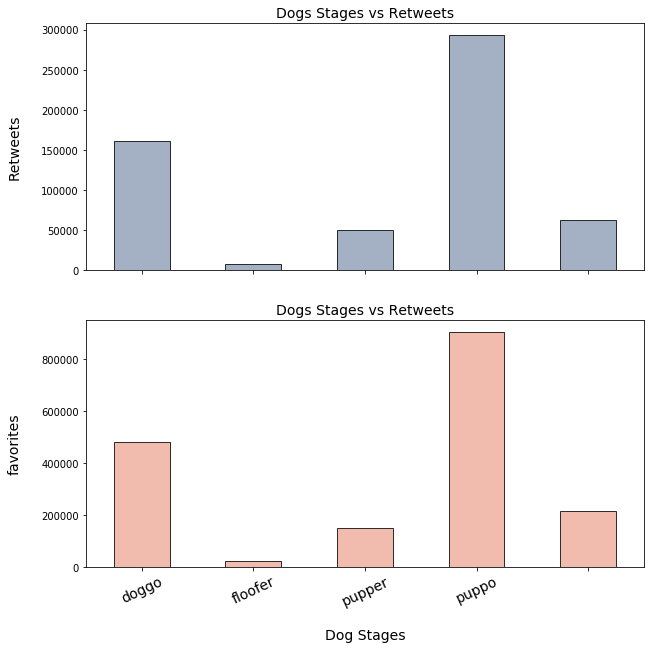

In [46]:
sum_retweets = df_master.groupby('dog_stage')['retweets'].sum()
sum_favorites = df_master.groupby('dog_stage')['favorites'].sum()

plt.subplot(2,1,1) 
stages_graph = sum_retweets.plot(kind='bar', figsize=(10, 10), alpha=0.8, color='#8d9db6' ,edgecolor='black')
stages_graph.set_title('Dogs Stages vs Retweets', size = 14)
stages_graph.set_xlabel('')
stages_graph.set_ylabel('Retweets', size = 14, labelpad=20)
stages_graph.set_xticklabels([], size = 14, rotation = 25)
rate_graph.grid(True, which='major', color='gray', alpha=0.1);

plt.subplot(2,1,2) 
stages_graph = sum_favorites.plot(kind='bar', figsize=(10, 10), alpha=0.8, color='#eeac99' ,edgecolor='black')
stages_graph.set_title('Dogs Stages vs Retweets', size = 14)
stages_graph.set_xlabel('Dog Stages', size = 14, labelpad=20)
stages_graph.set_ylabel('favorites', size = 14, labelpad=20)
stages_graph.set_xticklabels(['doggo','floofer','pupper','puppo'], size = 14, rotation = 25)
rate_graph.grid(True, which='major', color='gray', alpha=0.1);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


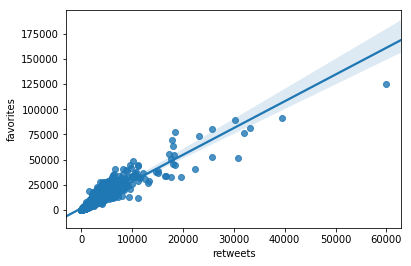

In [47]:
sns.regplot(x="retweets", y="favorites", data=df_master);

## Project's Insights

**#1#** Funny fact: Most of the dogs in this study have +10/10 rates :) 
* Rates Mean: 10.05/10
* Rates Median: 11/10
* Rates Max: 14/10
* Rates Min: 1/10

**#2#** The most favorited Dog Stage is (Pupper) stage, which has both the hights retweet and favorites rates. This stage is followed by Doggo, Puppo and finally Floofer stages. 

**#3#** More retweets rate indicates more faviorate rate. 